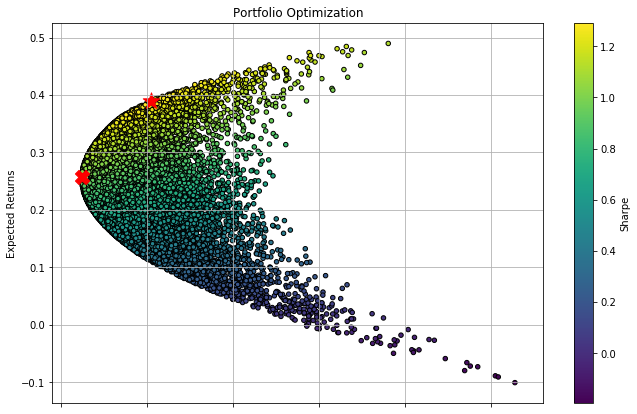

In [1]:
#Source: 파이썬 증권 데이터 분석 by 김황후

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from Investar import Analyzer

mk = Analyzer.MarketDB()
stocks = ['삼성바이오로직스', 'SK하이닉스', '카카오', 'NAVER']
df = pd.DataFrame()
for s in stocks:
    df[s] = mk.get_daily_price(s, '2017-01-04', '2020-04-27')['close']

# 일간 수익률, 연간 수익률, 일간 리스크, 연간 리스크를 구해보면
daily_ret = df.pct_change()
annual_ret = daily_ret.mean() * 252
daily_cov = daily_ret.cov()
annual_cov = daily_cov * 252

#포트폴리오를 담을 리스트 생성
port_ret = []
port_risk = []
port_weights = []

#몬테카를로 시뮬레이션
for _ in range(20000): 
    weights = np.random.random(len(stocks))
    weights /=np.sum(weights) # 각 비중을 총 합으로 나누어서 총합이 1이 되도록 계산
    
    returns = np.dot(weights, annual_ret) 
    risk = np.sqrt(np.dot(weights.T, np.dot(annual_cov, weights))) 
    
    port_ret.append(returns)
    port_risk.append(risk)
    port_weights.append(weights)

portfolio = {'Returns' : port_ret, 'Risk' : port_risk}
for i, s in enumerate(stocks):
    portfolio[s] = [weight[i] for weight in port_weights]
df = pd.DataFrame(portfolio)
df = df[['Returns','Risk']+ [s for s in stocks]]

df['Sharpe'] = df['Returns']/df['Risk']
max_sharpe = df.loc[df['Sharpe'] == df['Sharpe'].max()]
min_risk = df.loc[df['Risk'] == df['Risk'].min()]

df.plot.scatter(x='Risk', y = 'Returns', c = 'Sharpe', cmap = 'viridis', edgecolors='k', figsize=(11,7), grid=True)
plt.scatter(x=max_sharpe['Risk'], y = max_sharpe['Returns'], c='r', marker='*', s=300)
plt.scatter(x=min_risk['Risk'], y = min_risk['Returns'], c = 'r', marker = 'X', s=200)
plt.title('Portfolio Optimization')
plt.xlabel('Risk')
plt.ylabel('Expected Returns')
plt.show()

In [2]:
max_sharpe # 리스크당 수익률이 가장 큰 포트폴리오

,Returns,Risk,삼성바이오로직스,SK하이닉스,카카오,NAVER,Sharpe
5306,0.390447,0.302249,0.437459,0.239203,0.32331,0.000028,1.291804


In [3]:
min_risk # 리스크가 가장 적은 포트폴리오

,Returns,Risk,삼성바이오로직스,SK하이닉스,카카오,NAVER,Sharpe
11092,0.257243,0.262193,0.16866,0.337319,0.343234,0.150787,0.981124
